<a href="https://colab.research.google.com/github/sunwoo0506/sunwoo0506/blob/main/20231006_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#라이브러리 불러오기
import pandas as pd


In [5]:
#와인데이터 불러오기
from sklearn.datasets import load_wine
dataset=load_wine()
data=pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [8]:
#데이터 샘플 확인
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##**bold text**# 스케일링


In [12]:
#스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data=scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [13]:
#데이터복사(df변수)
df=data.copy()

### PCA


In [19]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA




In [20]:
#PCA
pca= PCA(n_components=2)

In [22]:
#PCA 변환
df=pca.fit_transform(df)

In [23]:
#데이터크기확인
df.shape

(178, 2)

In [25]:
#샘플데이터확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

### PCA(2차원) 시각화


In [30]:
#시각화 라이브러리
import matplotlib.pyplot as plt

In [33]:
#데이터프레임 변환
df= pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


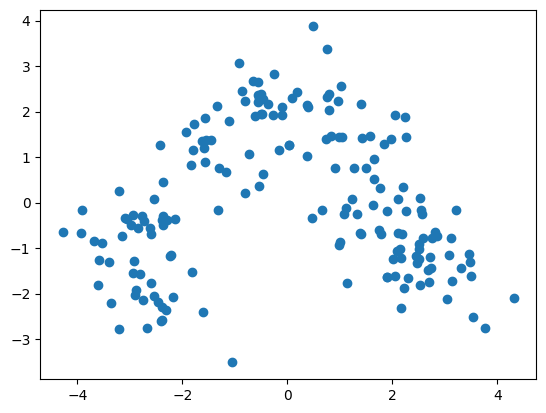

In [35]:
#scatter

plt.scatter(df.iloc[:,0], df.iloc[:,1])

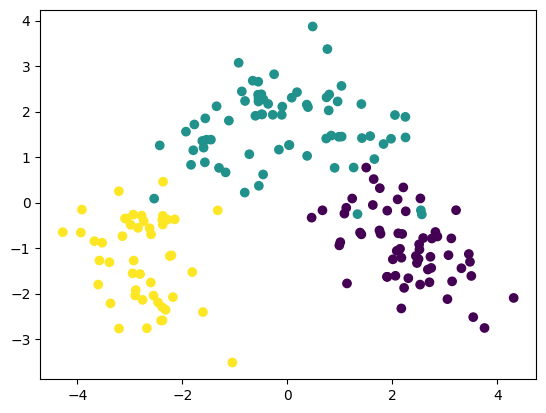

In [38]:
#scatter(c=target)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [42]:
#데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.36198848 0.1920749 ]
0.5540633835693531


### 지도학습(PCA 전후 비교)


In [49]:
#PCA 후 데이터로 머신러닝(2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model=RandomForestClassifier(random_state=2022)
cross_val_score(model,df,dataset.target, scoring ='accuracy', cv=5).mean()



0.9492063492063492

In [52]:
#PCA 전 데이터로 머신러닝(13)
cross_val_score(model, data, dataset.target, scoring ='accuracy', cv=5).mean()

0.9553968253968254

###PCA(3차원)시각화

In [59]:
# 새 데이터 복사
df=data.copy()

In [60]:
#pca (n_components=3)
pca= PCA(n_components=3)

In [62]:
#pca 변환
df = pca.fit_transform(df)

In [64]:
# 데이터프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [57]:
# 시각화(3차원)

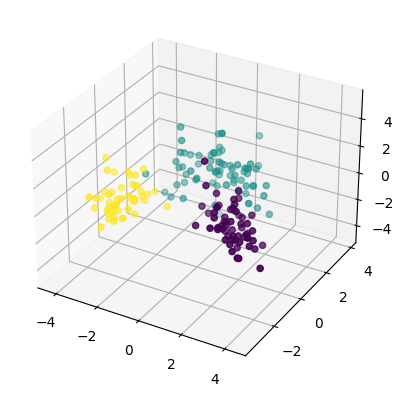

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2], c=dataset.target)





### 점진적PCA
* 데이터 셋이 큰경우 활용(배치를 통해 점진적 수행)

In [81]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [88]:
# 데이터 복사

df = data.copy()

In [89]:
# 점진적 PCA
pca=IncrementalPCA(n_components=2, batch_size=16)

In [90]:
# 점진적 PCA 변환
df=pca.fit_transform(df)
df[:3]

array([[ 3.48409487,  0.81258752],
       [ 2.26745536, -1.60344564],
       [ 2.59456413,  1.10292192]])

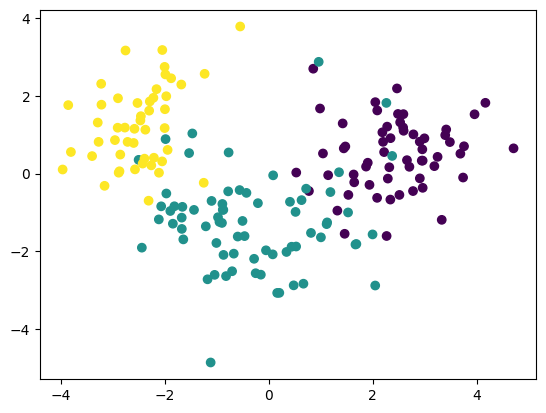

In [91]:
#시각화
df=pd.DataFrame(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=dataset.target)

In [96]:
# 데이터 설명
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.3400206  0.15239134]
0.4924119400154383


### 희소 PCA
* 적절한 희소성을 유지(alpha 값으로 조정)
* 오버피팅 방지


In [102]:
# 라이브러리 불러오기

from sklearn.decomposition import SparsePCA

In [103]:
# 데이터 복사
df = data.copy()

In [124]:
# 희소PCA
pca = SparsePCA(n_components=2, alpha =0.01 )

In [105]:
# 희소PCA 변환
df = pca.fit_transform(df)

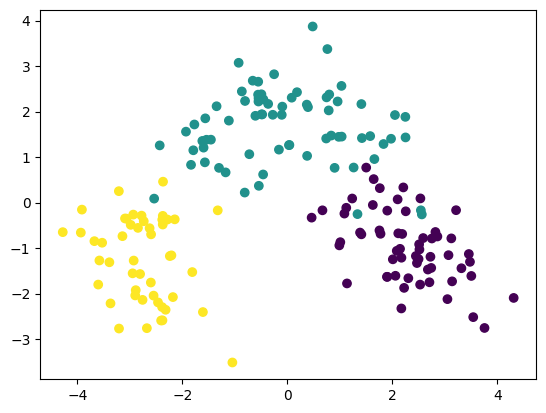

In [125]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=dataset.target)

### 커널PCA
* 비선형으로 차원 축소

In [112]:
# 라이브러리 불러오기

from sklearn.decomposition import KernelPCA

In [113]:
# 데이터 복사
df = data.copy()

In [114]:
#커널PCA

pca=KernelPCA(n_components=2)

In [115]:
#커널PCA 변환

df=pca.fit_transform(df)

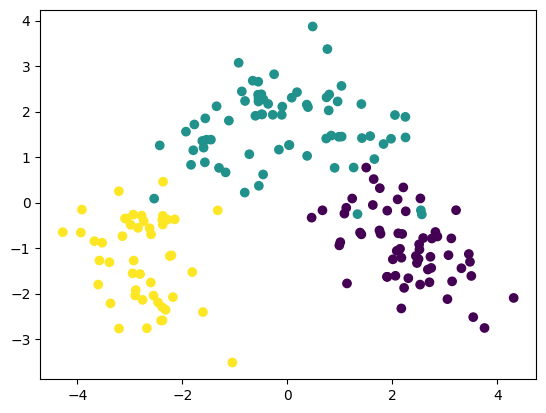

In [116]:
#시각화
df= pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

###SVD(singular Value Decomposition)
* 행렬을 특정한 구조로 분해하는 방식
* 신호처리와 통계학 등의 분야에서 자주 사용됨

In [120]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [122]:
# SVD 적용
df =data.copy()
svd=TruncatedSVD(n_components=2)
df=svd.fit_transform(df)

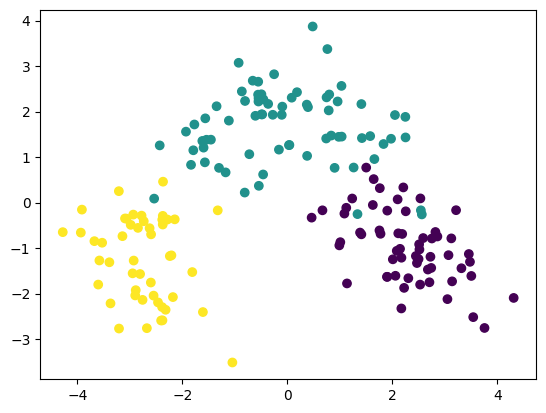

In [123]:
# 시각화
df=pd.DataFrame(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=dataset.target)